In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /home/zer0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zer0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zer0/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/zer0/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
accountant = ""
generalmanager = ""
with open("accountant.txt") as f:
    accountant = " ".join(f.readlines())
with open("generalManager.txt") as f:
    generalmanager = " ".join(f.readlines())

In [3]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^А-Яа-яA-Za-z]', ' ', text)
    # text = re.sub(r'\n', " ", text)
    text = re.sub(r'[ ]{2,}',' ',text)
    text = text.strip()
    return text

In [4]:
def getFreqDist(text, cloud=False):
    processed = preprocess(text)
    tokens = word_tokenize(processed)
    text = nltk.Text(tokens)
    tokens = [token.strip() for token in tokens if token not in russian_stopwords]
    tokens = [ps.stem(w) for w in tokens]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    text = nltk.Text(tokens)
    if cloud:
        text_raw = " ".join(text)
        wordcloud = WordCloud().generate(text_raw)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    fdist = FreqDist(text)
    return fdist

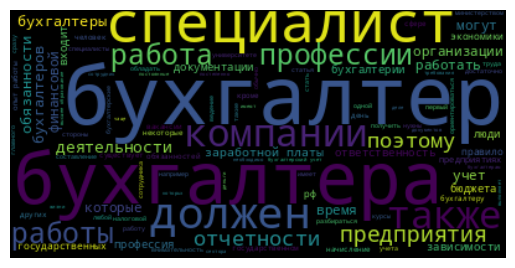

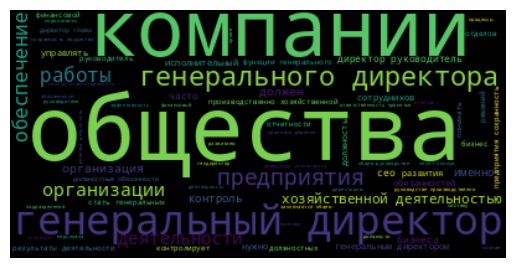

In [5]:
acc = getFreqDist(accountant, cloud=True)
gen = getFreqDist(generalmanager, cloud=True)

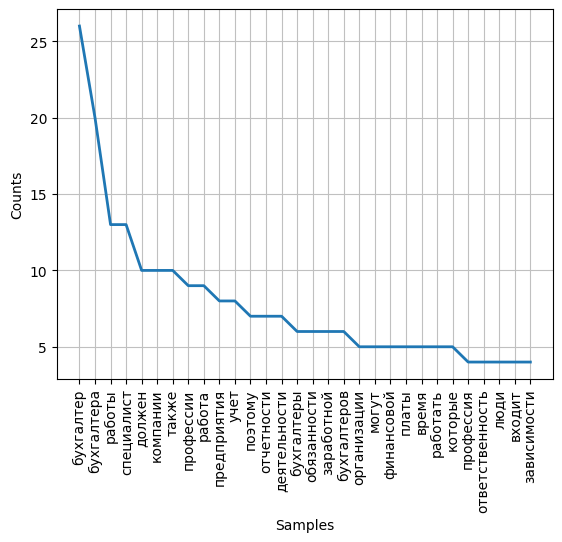

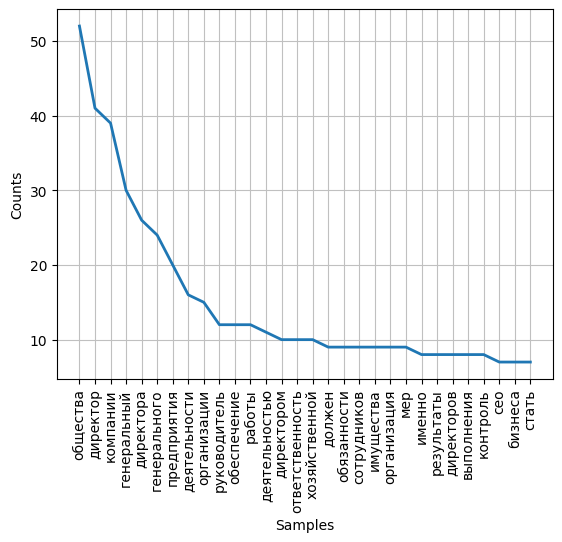

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [6]:
acc.plot(30,cumulative=False)
gen.plot(30,cumulative=False)

In [7]:
import pandas as pd

In [8]:
acc

FreqDist({'бухгалтер': 26, 'бухгалтера': 20, 'работы': 13, 'специалист': 13, 'должен': 10, 'компании': 10, 'также': 10, 'профессии': 9, 'работа': 9, 'предприятия': 8, ...})

In [9]:
acc_df = pd.DataFrame(data=acc.items(), columns=['token','freq'])
acc_df = acc_df.sort_values('freq',ignore_index=True,ascending=False)
gen_df = pd.DataFrame(data=gen.items(), columns=['token','freq'])
gen_df = gen_df.sort_values('freq',ignore_index=True,ascending=False)

In [10]:
acc_df

,token,freq
0,бухгалтер,26
1,бухгалтера,20
2,работы,13
3,специалист,13
4,должен,10
...,...,...
1072,аналитическими,1
1073,способностями,1
1074,хорошей,1
1075,памятью,1


In [11]:
acc_df.to_csv('accountant.csv', sep=';', encoding='utf-8') 
gen_df.to_csv('generalmanager.csv', sep=';', encoding='utf-8') 